# Machine Learning Assignment 2

### Aditya Rathi

#### Contents
 
1. Introduction 
2. Data
3. Method 
   - Summary
   - Explanation of Code
   - Pocket ALgorithm
   - LDA
   - QDA
   - Logistic Regression
4. Experiment
   - Precision
   - Recall
   - F1 Score
   - ROC 
   - AUC
   - Confusion matrix
5. Discussion about Classification models
   - Discussion about Train and Test accuracy
   - Discussion for Classification model comparision
6. Conclusion
7. Refrences


# I. Introduction

The objective of this assignment is to build classification model using 4 different methods. We are going to use the classification data which we have used in the data visualization assignment. Four different methods which we are using for classification models are :- 

1. Pocket Algorithm
2. Linear Discriminant Analysis(LDA)
3. Quadratic Discriminant Analysis(QDA)
4. Logistic Regression

The total assignment has the following steps :-

1. Selecting Data
2. Preliminary Data visualization
3. Implementing 4 Classification model
   - Base Classifier
   - Pocket Algorithm
   - LDA implementation
   - QDA implementation
   - Logistic Regression
4. Train and Test data on all the above classification model 
5. Evaluation metrics 
6. Comparision of Models and Explanation of Results




# II. Classification Data

The data which I chose for this assignment belongs to the bank marketing data. Banking being an important field classification model can help us explore new scenarios in this data. Modeling based can help us explore new feature in this data.

#### Data Source: 

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

The main thing of marketing of a product is to call the customer and explain them the product. The call can be done in a few attempts. The main output for this is to predict whether the bank customer after receiving the call buy the product from the marketing team. The classification model will help us analyse which customer would buy the product. 

#### Features

Input variables:

bank client data:

1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
 
related with the last contact of the current campaign:

8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)



### Code

#### Reading the Data

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [54]:
df1=df.copy(deep=True)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
list(df1.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [56]:
df1.columns = [c.replace('.', '_') for c in df1.columns]
list(df1.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

In [57]:
df1.duration.unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [58]:
job_map={'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':10,'entrepreneur':11, 'student':12}
df1['job']=df1['job'].map(job_map)
marital_map={'married':1, 'single':2, 'divorced':3, 'unknown':4}
df1['marital']=df1['marital'].map(marital_map)
education_map={'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,'professional.course':5, 'unknown':6, 'university.degree':7,     'illiterate':8}
df1['education']=df1['education'].map(education_map)
default_map={'no':1, 'unknown':3, 'yes':2}
df1['default']=df1['default'].map(default_map)
housing_map={'no':1, 'yes':2, 'unknown':3}
df1['housing']=df1['housing'].map(housing_map)
loan_map={'no':1, 'yes':2, 'unknown':3}
df1['loan']=df1['loan'].map(loan_map)
contact={'telephone':1, 'cellular':2}
df1['contact']=df1['contact'].map(contact)
month={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9}
df1['month']=df1['month'].map(month)
day={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df1['day_of_week']=df1['day_of_week'].map(day)
poutcome={'nonexistent':1, 'failure':2, 'success':3}
df1['poutcome']=df1['poutcome'].map(poutcome)
y={'no':0, 'yes':1}
df1['y']=df1['y'].map(y)



In [59]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
D=df.head(10000)

groupName = []                                   
count = []
for group_name, subset in D.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
[1299, 761, 1820, 2382, 2, 1142, 2109, 485]


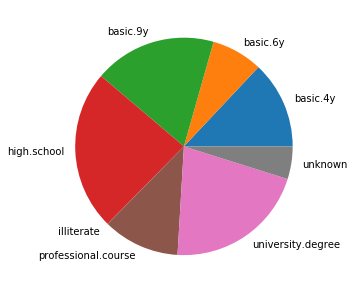

In [61]:
#groupName=['basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown', 'university.degree',     'illiterate']
plt.figure(figsize = (5, 5))
plt.pie(count, labels = groupName)
plt.show()

The pie chart helps us to know what is the education level of the people in the dataset

<Figure size 1080x432 with 0 Axes>

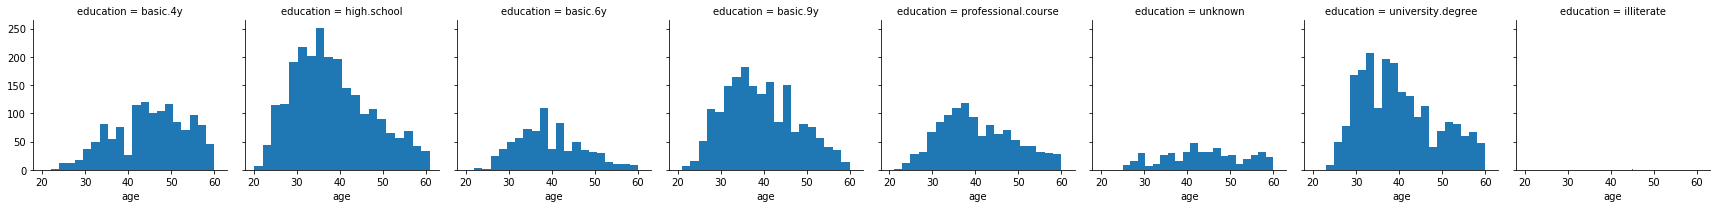

In [62]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(D, col='education')
g.map(plt.hist, 'age', bins=20)

This visualization was done to plot the histogram of people with age group with respect to the education they have. There is two figures with education to high school and university degree are major showcase from this visualization

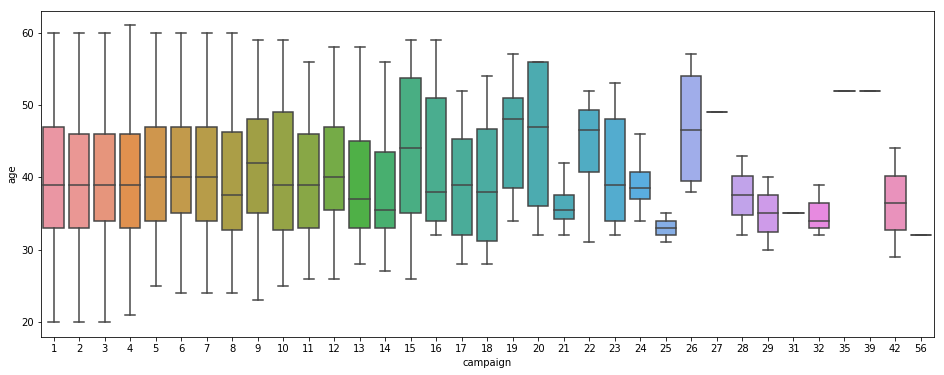

In [63]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='campaign', y='age', data=D)

This Visualization was done to show the campaign of calls (nos.of calls) done by marketing team to customer based on their age group

In [64]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

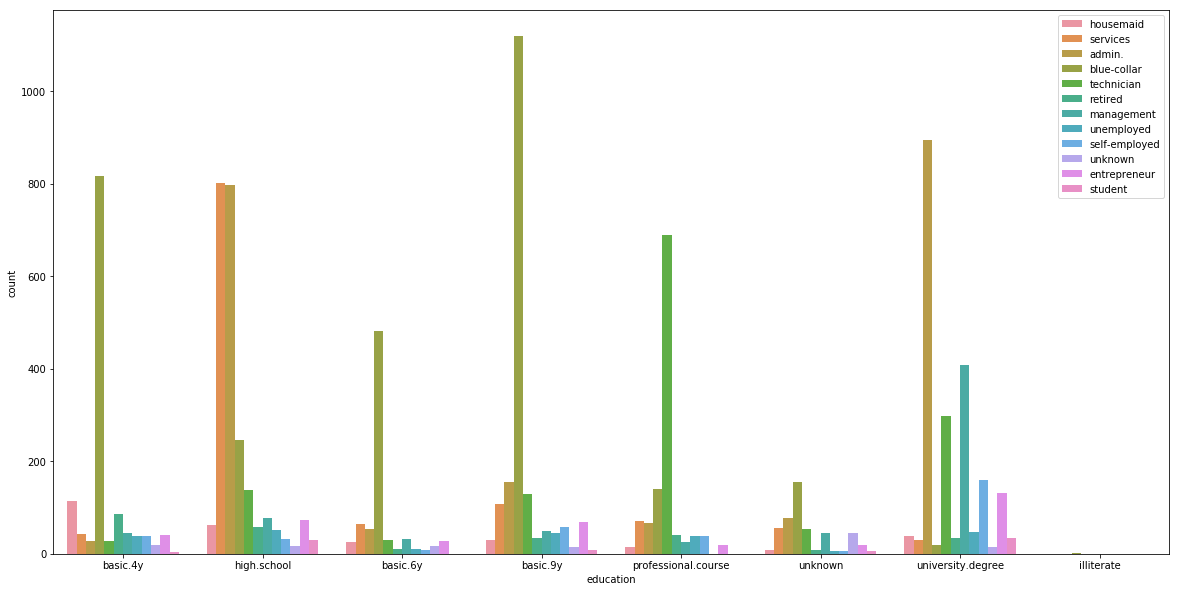

In [65]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(D['education'],hue=D['job'])
plt.legend(loc='upper right', labels=['housemaid', 'services', 'admin.', 'blue-collar', 'technician',       'retired', 'management', 'unemployed', 'self-employed', 'unknown',       'entrepreneur', 'student'])

The bargraph shows the count of people with respect to education and job type they are doing.

<Figure size 1440x1368 with 0 Axes>

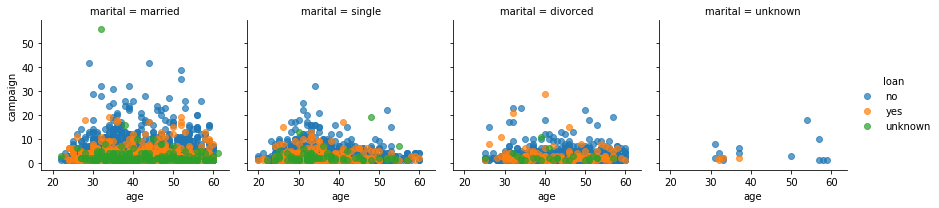

In [66]:
plt.figure(figsize=(20,19))
g = sns.FacetGrid(D, hue="loan", col="marital")
g.map(plt.scatter, "age", "campaign", alpha=.7)
g.add_legend();

Visualization of the campaign of calls done to people based on their marital status and the loan if they have any.

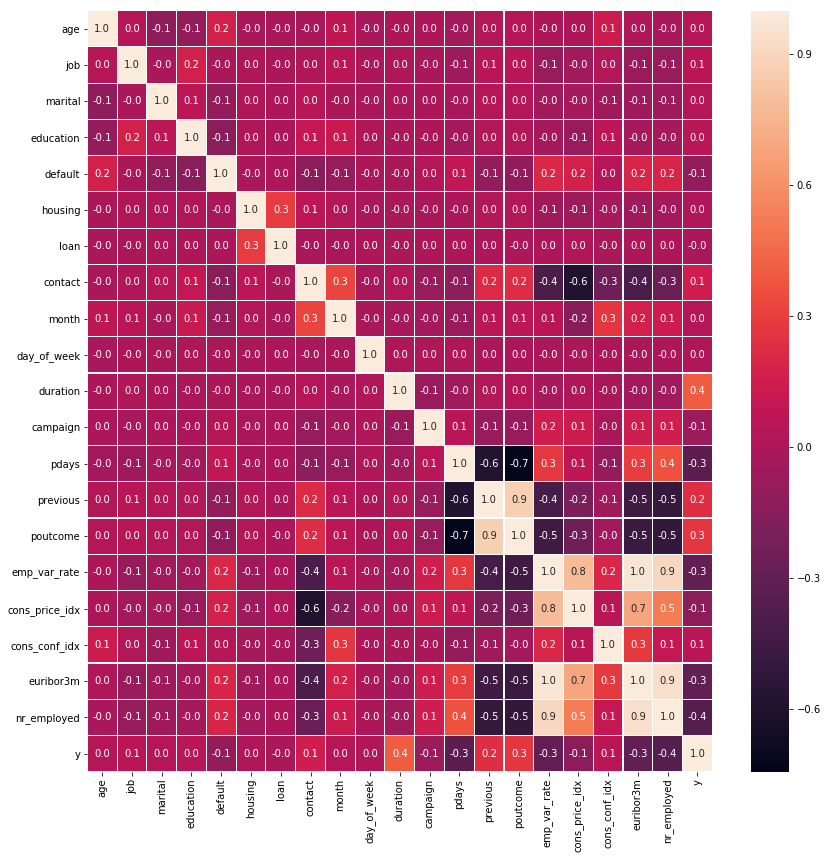

In [67]:
plt.subplots(figsize=(14, 14))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

### Preliminary observation

1. From the pie chart we got to know that majority of the people are literate with a basic high school education. 
2. Vast majority of people have education in two types i.e High School and University degree compared to others.
3. The box plot gives us the around 15 or 16 calls to middle age group of people 40 t0 60yrs.
4. People with university degree are vast majority working as services and technicians or are self employed. And starting education with basic 4 year to 9 year college majority of people work as blue collar jobs.
5. The last is people whose marital status is not known doesnot have a loan with them or only few people have a loan on themselves.
6. People who are married and doesn't have a loan gets more number call for the marketing of this product compared to people with unknown loan status get only few calls.
7. The heat map gives us a good idea about all the correleation between the features we can use during our classification problem.


# III. Method

## Summary of Classification Models


### 1. Pocket Algorithm

Pocket algorithm solves the problem of perceptron by keeping the best value with itself. In perceptron the drawback was it would just keep the last calculated weight by itself. As pocket algorithm keeps the best result with iself therefore the misclassification is minimum. It repeatedly runs the perceptron algorithm to calculate the weights and maintains it in the pocket which remains unchanged for highest number of iteration.


### 2. LDA

Linear Discriminant Analysis as the name suggests is dimensionality reduction technique but retaining as much information as possible from the dataset. We seek to obtain a transformation of X to Y through projecting the samples in X onto a hyperplane with dimension C-1. 


### 3. QDA

QDA is not really that much different from LDA except that you assume that the covariance matrix can be different for each class and so, we will estimate the covariance matrix $ Σ_k $  separately for each class k, k =1, 2, ... , K. The classification rule is similar as well. You just find the class k which maximizes the quadratic discriminant function.A disadvantage of QDA is that it cannot be used as a dimensionality reduction technique.

###  4. Logistic Regression

Logistic regression for classification is a discriminative modeling approach, where we estimate the posterior probabilities of classes given X directly without assuming the marginal distribution on X.  Logistic Regression is used when the dependent variable(target) is categorical.


## Explanation of Code

##### 1. Classifier

Classifier is the parent class which is used for all the classification model. 

1. The initialization has two variable mean and standard deviation. Normalize method has the normalization formula which is used to normalize the data. 

2. Chech Matrix just check the shape of the matrix which is passed. If it is not 2 dimensional then just pass an error.

3. Train and Use are the abstract methods which are overridden in the child classes.

##### 2. Pocket Algorithm

Pocket algorithm in first I have implemented the Perceptron Algorithm which has basic functionality of pocket algorithm. The Pocket algorithm consists of the apha which is the learning rate and the pocket. The Pocket algorithm has two methods Train and Use explained as follows

1. Train method is used to calculate the weights. In this weight is calculated at every iteration of input samples and the weight is saved which is passed to compare method so that the best weight can be saved and used for next iteration. The best weight is kept in w_pocket. 

2. Use method is performed after the train method is performed as w_pocket is calcuated in train method. In the use method we are actually calcuating the dot product of w_pocket and the input data. 

##### 3. Linear Discriminant Analysis

The LDA class has overridden the normalize, train and use method from the classifier class. First the data is classified in two groups on the basis of the ouput which is either yes or no. The LDA returns the discriminant value of each class . The normalize, train and use method are explained below: -

1. Normalize : - This method calcuates the mean and standard deviation from the input data which are then used in the normalize formaula which is $ normalize = \frac {X-X_{mean}}{X_{std}} $ 

2. Train : - This method takes in the input data and calculates the mu by calculating the mean and then return the mu

3. Use : - The use method first calculates the inverse of sigma as we can see in the use defination code

##### 4. Quadratic Discriminant Analysis

The QDA class has overridden the normalize, train and use method from the classifier class. First the data is classified in two groups on the basis of the ouput which is either yes or no. The QDA returns the discriminant value of each class . The normalize, train and use method are explained below: -

1. Normalize : - This method calcuates the mean and standard deviation from the input data which are then used in the normalize formaula which is $ normalize = \frac {X-X_{mean}}{X_{std}} $ 

2. Train : - This method takes in the input data and calculates the mu and sigma by calculating the covariance and then return the mu

3. Use : - This method calculates covariance matrix for both categories(unlike LDA), this means cov matrix is quadratic. The use method first calculates the inverse of sigma as we can see in the use defination code

##### 5. Logistic Regression

This class inherits the classifier base class inheriting the train and use method which have been explained. This class also has softmax and g method as helper methods.

1. g() calculates the dot product of the weigths and the feature vector and passes the value to softmax which normalizes the value in the range of 0 to 1. 

2. Train method updates the weight iteratively after calculating the derivative of softmax transformation. it uses the function softmax and uses the function g for calculating the dot product of the weight matrix and input matrix.

3. Use method is performed after the train method is performed as weight matrix is calcuated in train method. In the use method we are actually calcuating the dot product of weight matrix and the input data. 

In [68]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X -self.meanX)/ self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Pocket Algorithm

To overcome the unstability of the perceptron algorithm, the pocket algorithm keeps the best weight so far *in its pocket*. Thus, $w_{pocket}$ will contain the best weight so far calculated.

In [69]:
import matplotlib as mt
from matplotlib import pyplot as plt

In [70]:
def normalize(X):
    return X/X.max()

In [71]:
df2=df1.copy(deep=True)

1000
End of training:  99


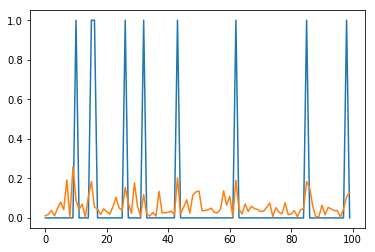

In [72]:

#df2["age"] = normalize(df2["age"])
#df2["job"] = normalize(df2["job"])
#df2["housing"] = normalize(df2["housing"])
#df2["duration"] = normalize(df2["duration"])
#df2["education"] = normalize(df2["education"])
#df2["default"] = normalize(df2["default"])
#df2["contact"] = normalize(df2["contact"])
#df2["marital"] = normalize(df2["marital"])

data = df2.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000,:]

X = training_data[["age","job","education","housing",'default','contact','duration','marital']].values
X = X[:1000]
N = X.shape[0]
print(N)
T = training_data[["y"]].values
T = T[:1000]
X_Test = testing_data[["age","job","education","housing",'default','contact','duration','marital']].values
T_Test = testing_data[["y"]].values

X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))

maxiter = 100
alpha = 0.1
w = np.zeros(9) 
plt.plot(T[:100])
for i in range(maxiter):
    
    converged = True
    for k in range(N):
        y = w @ X1[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X1[k]
            converged = False
        #print(w)
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
Y = X1@w
Y=normalize(Y)
plt.plot(Y[:100])



The above is a implementation of Perceptron Algorithm for reference for Pocket Algorithm

### Pocket Algorithm

In [73]:

from copy import deepcopy as copy 

class PocketAlgorithm(Classifier): 
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
       
 # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        
        def compare(X, T, w, wp):
            y = np.sign(X @ w)
            yp = np.sign(X @ wp)
            y=normalize(y)
            yp=normalize(yp)
            #print("for y:",np.sum(y == T))
            #print("for yp:",np.sum(yp == T))
            return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
        w = np.zeros(9)
        N=X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        self.w_pocket = copy(w)
        maxiter = 30
        plt.plot(T[:100])
        for i in range(maxiter):
    
            converged = True
            #print(i,N,maxiter)
            for k in np.random.permutation(N): #range(N):
                    y = w @ X1[k]
                    if np.sign(y) != np.sign(T[k]):
                        w += self.alpha * T[k] * X1[k]
                        converged = False
                        ##### additional for pocket algorithm 
                    if compare(X1, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)

   # apply the learned model to data X
    def use(self, X):
        #print(X1)
        #print("wpocket:",self.w_pocket)
        Y1 = X1@self.w_pocket
        Y1=normalize(Y1)
        plt.plot(Y1[:100])
        return Y1

C:\Users\rathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


End of training:  29


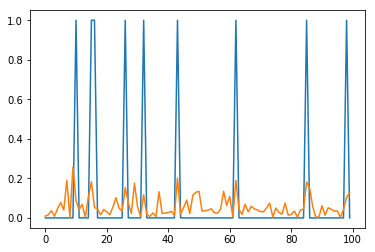

In [74]:
P = PocketAlgorithm(0.1)
P.train(X[:1000],T[:1000])
Y = P.use(X_Test[:1000])

In [75]:
T_Test=T_Test.flatten()
T_Test=T_Test[:1000]
Y1=Y

In [76]:
Y1 = np.where(Y1 > 0.3,1,0)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_Test, Y1)
cf

array([[859,  21],
       [119,   1]], dtype=int64)

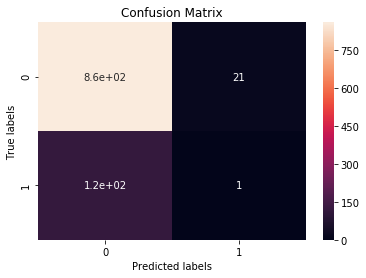

In [77]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [78]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_curve
Y = np.where(Y > 0.5,1,0)
print("Precision:- {:.2f}%".format(100 * precision_score(T[:500],Y1[:500])))
print("Recall:- {:.2f}%".format(100 * recall_score(T[:500],Y1[:500])))
print("F1 score:- {:.2f}%".format(100 * f1_score(T[:500],Y1[:500])))

Precision:- 58.33%
Recall:- 13.73%
F1 score:- 22.22%


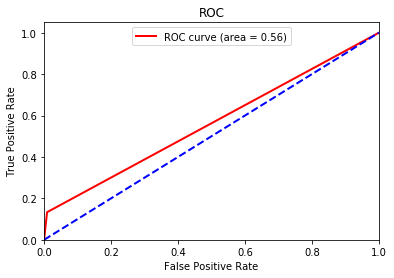

In [79]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T, Y1)
#print(fpr,tpr)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.title('ROC')
plt.show()

### LDA



Linear Discriminant Analysis can be broken up into the following steps:

- Compute the within class and between class scatter matrices
- Compute the eigenvectors and corresponding eigen values for the scatter matrices
- Sort the eigen values and select the top k
- Create a new matrix containing eigenvectors that map to the k eigenvalues
- Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4


###### Within Class Scatter Matrix
We calculate the within class scatter matrix using the following formula: -

$ S_w=Σ_{i=1}^c S_i  $

where c is the total number of distinct classes and 

$ S_i=Σ_{x∈D_i}^n (x-m_i)(x-m_i)^T  $


$ m_i=\frac{1}{n_i}_iΣ_{x∈D_i}^n (x_k)  $

where x is a sample (i.e. row) and n is the total number of samples with a given class.


###### Between Class Scatter Matrix

we calculate the between class scatter matrix using the following formula.

$ m_i=Σ_{x∈D_i}^n (x-m_i)(x-m_i)^T  $

$ m_i=\frac{1}{n_i}_iΣ_{x∈D_i}^n (x_k)  $

$ m=\frac{1}{n}Σ_{i}^n (x_i)  $

###### Generalized Eigenvalue
solving the generalized eigenvalue problem for  $ S_w^{-1}S_B$  to obtain the linear discriminants.

##### LDA

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function:

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

###### Dot Product
we save the dot product of X and W into a new matrix Y

$ Y=X.W $

In [80]:
from copy import deepcopy as copy 

class LDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        mean,std = np.mean(X, 0),np.std(X, 0)
        #print(means,stds)
        Xs = (X - mean) / std
        #print(Xs)
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        #print(mu)
        return mu

    def use(self,X,mu,sgma,prior):
        sgma_inv = np.linalg.inv(sgma)
        #print(sgma_inv)
        #a=np.sum(np.dot(X, sgma_inv) * mu \ - 0.5 * np.dot(mu, sgma_inv) * mu \ + np.log(prior), axis=1)
        #print(a)
        return np.sum(np.dot(X, sgma_inv) * mu \
                - 0.5 * np.dot(mu, sgma_inv) * mu \
                + np.log(prior), axis=1)

#### Preparing Data

In [81]:
df2 = df1[["age","job","education",'default','contact','duration','marital','y']]
df2 = df2.sample(10916)
df2.head()

,age,job,education,default,contact,duration,marital,y
28074,51,5,5,1,2,314,3,0
14214,30,5,5,1,2,41,1,0
19045,39,3,7,1,2,328,1,0
5751,31,3,7,1,1,177,2,0
28646,57,6,1,1,2,199,1,0


In [82]:
df2_train = df2[:8000]
df2_test = df2[8000:10916]
T_Test=df2_test[['y']]
df2_test = df2_test.drop(columns =['y'])

In [83]:
c1=df2_train[df2_train['y']==0]
c2=df2_train[df2_train['y']==1]

In [84]:
c1=c1.drop(columns =['y'])
c2=c2.drop(columns =['y'])
N1 = len(c1)
N2 = len(c2)
X = np.vstack((c1, c2))
N=N1+N2

#### Training the Data

In [85]:
l = LDA_Algorithm()
#Xs = l.normalize(X)
Xs=X

In [86]:
mu1 = l.train(Xs,0,N1)
mu2 = l.train(Xs,N1,N)
Sigma = np.cov(Xs.T)
prior1 = N1 / N
prior2 = N2 / N

In [87]:
prior1

0.887125

##### Testing Data

In [88]:
xs, ys = np.meshgrid(np.linspace(-20,20, 54), np.linspace(-20,20, 54))
Xtest = np.vstack((xs.flat, ys.flat)).T
#XtestS = l.normalize(df2_test.values)
#df2_test.info()
XtestS=df2_test.values
d1 = l.use(XtestS, mu1, Sigma, prior1)
d2 = l.use(XtestS, mu2, Sigma, prior2)

##### LDA Discriminant Function, Decision Boundary

Text(0.5, 1.0, 'Decision Boundary')

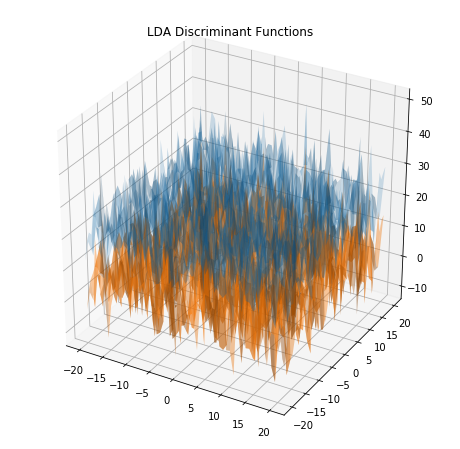

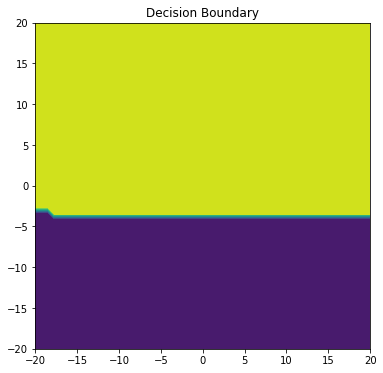

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(ys.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys,np.sort((normalize(d1-d2) > 0.86),0).reshape(xs.shape))
plt.title("Decision Boundary")

In [90]:
D2 = []
D2.append(normalize(d2))
D2.append(normalize(d1))
#D2=l.normalize(D2)
D2=np.array(D2)
D2 = np.where(D2 > 0.5,1,0)
D2 = np.argmax(D2,axis=0)
#print(D)
# for i in range(len(D2)):
#     if D2[i] == 0:
#         D2[i] = -1
#normalize(D2)


In [91]:
D2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

###### Evaluation Metrics

In [92]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D2,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D2,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D2,average='micro')))

Precision: 76.95%
Recall: 76.95%
F1 score: 76.95%


###### ROC curve

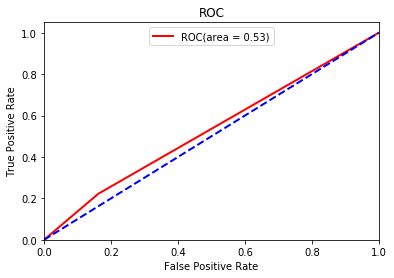

In [93]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test, D2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
#print(fpr,tpr)
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="upper center")
plt.show()

###### Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_Test, D2)
cf

array([[2172,  420],
       [ 252,   72]], dtype=int64)

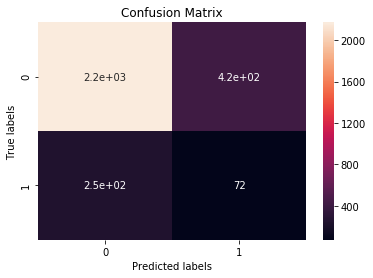

In [95]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

### QDA

QDA is not really that much different from LDA except that you assume that the covariance matrix can be different for each class and so, we will estimate the covariance matrix $ Σ_{k} $ separately for each class k, k =1, 2, ... , K.

Quadratic discriminant function:

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

This quadratic discriminant function is very much like the linear discriminant function except that because $ Σ_{k} $, the covariance matrix, is not identical, you cannot throw away the quadratic terms. This discriminant function is a quadratic function and will contain second order terms.

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

QDA, because it allows for more flexibility for the covariance matrix, tends to fit the data better than LDA, but then it has more parameters to estimate. The number of parameters increases significantly with QDA. Because, with QDA, you will have a separate covariance matrix for every class. If you have many classes and not so many sample points, this can be a problem.

In [96]:
from copy import deepcopy as copy 

class QDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        mean,std = np.mean(X, 0),np.std(X, 0)
        Xs = (X - mean) / std
        #print(Xs)
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        Sigma = np.cov(X[S:E].T)
        #print(mu,Sigma)
        return mu,Sigma

    def use(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        #print(sigma_inv)
        diffv = X - mu
        #print(diffv)
        #a=-0.5  * np.log(np.linalg.det(sigma)) \- 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \+ np.log(prior)
        #print(a)
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)


#### Preparing Data

In [97]:
X = np.vstack((c1, c2))
N=N1+N2
#print(N1,N2)
#print(N)

In [98]:
q = QDA_Algorithm()
Xs = q.normalize(X)

#### Training Data

In [99]:
mu1,Sigma1 = q.train(Xs,0,N1)
mu2,Sigma2 = q.train(Xs,N1,N)

#print(mu1,Sigma1)
#print(mu2,Sigma2)

prior1 = N1 / N
prior2 = N2 / N

#print(prior1)
#print(prior2)

#### Testing Data

In [100]:
xs, ys = np.meshgrid(np.linspace(-20,5,54), np.linspace(-20,5,54))
XtestS = q.normalize(df2_test.values)
d1 = q.use(XtestS, mu1, Sigma1, prior1)
d2 = q.use(XtestS, mu2, Sigma2, prior2)

#### QDA Discriminant function, Decision boundary

Text(0.5, 1.0, 'Decision Boundary')

<Figure size 576x576 with 0 Axes>

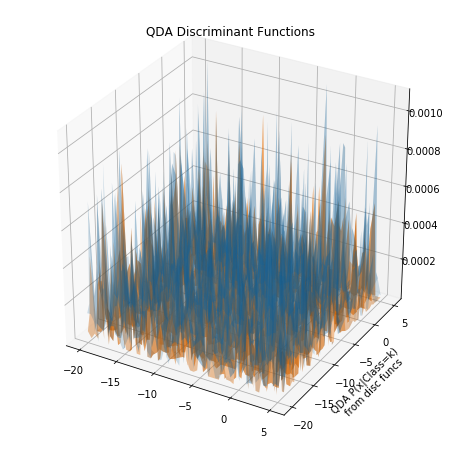

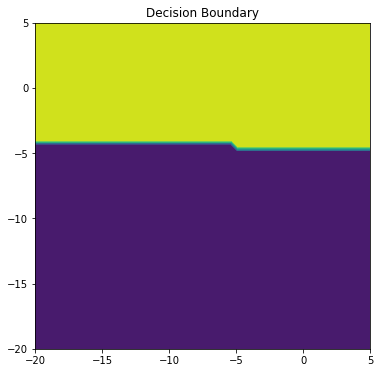

In [101]:

fig = plt.figure(figsize=(8,8))
#ax = fig.gca(projection='3d')
#ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
#ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.title("QDA Discriminant Functions")


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort((normalize(d1-d2) > 0.5),0).reshape(xs.shape))
plt.title("Decision Boundary")



In [102]:
D2 = []
D2.append(q.normalize(d1))
D2.append(q.normalize(d2))
#D2=l.normalize(D2)
D2=np.array(D2)
D2 = np.where(D2 > 0.6,1,0)
D2 = np.argmax(D2,axis=0)
#print(D)
# for i in range(len(D2)):
#     if D2[i] == 0:
#         D2[i] = -1
#normalize(D2)


In [103]:
D2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Evaluation Metrics

In [104]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D2,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D2,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D2,average='micro')))

Precision: 71.78%
Recall: 71.78%
F1 score: 71.78%


#### ROC curve

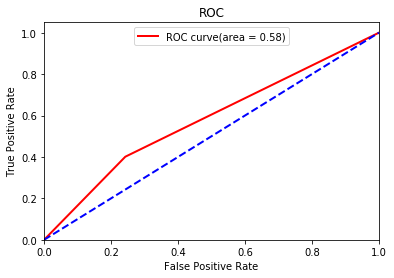

In [105]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test, D2)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.show()

#### Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_Test, D2)
cf

array([[1963,  629],
       [ 194,  130]], dtype=int64)

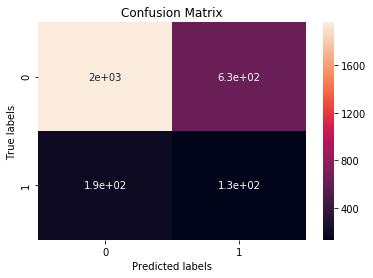

In [107]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Logistic Regression


Logistic regression models the probabilities for classification problems with two possible outcomes. It’s an extension of the linear regression model for classification problems.

The logistic function is defined as: 

$ logistic({\mu}) = $ $ \frac{1}{1+exp({-\mu})} $


In [108]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        #print(f)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        self.w = np.random.rand(D+1, K)

        niter = 10
        X = self.add_ones(X)
        #print(X)
        T = self.add_ones(T.reshape(-1,1))
        #print(T)
        for step in range(niter):
                ys = self.g(X,self.w)
                #print(ys)
                self.w += self.alpha * X.T @ (T - ys)                
                #print(self.w)
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

#### Preparing Data

In [109]:
data = df1.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000]

In [110]:
X_Train = training_data[["age","job","education",'default','contact','duration','marital']].values
N = X.shape[0]
T_Train = training_data[['y']].values


In [111]:
X_Test = testing_data[["age","job","education",'default','contact','duration','marital']].values
T_Test = testing_data[["y"]].values

##### Training and Testing

In [112]:
lr = LogisticRegression(0.000002)
lr.train(X_Train[:5000],T_Train[:5000])
Y = lr.use(X_Test[:1000])

In [113]:
Y

array([[0.81809514, 0.18190486],
       [0.17169263, 0.82830737],
       [0.59311871, 0.40688129],
       ...,
       [0.93364819, 0.06635181],
       [0.15710319, 0.84289681],
       [0.63285474, 0.36714526]])

In [114]:
Yl = np.argmax(Y, 1)


#### Actual vs Predicted


Accuracy: 57.55 %


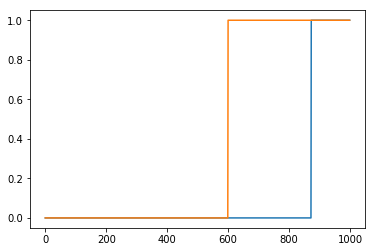

In [115]:
#Tl=np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test[:1000],0))
plt.plot(np.sort(Yl,0))

print("Accuracy:", np.around(100 - np.mean(np.abs(T_Test - Yl)) * 100,3), "%")

#### Evaluation Matrix

In [116]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test[:1000],Yl,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test[:1000],Yl,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test[:1000],Yl,average='micro')))

Precision: 50.50%
Recall: 50.50%
F1 score: 50.50%


#### ROC curve

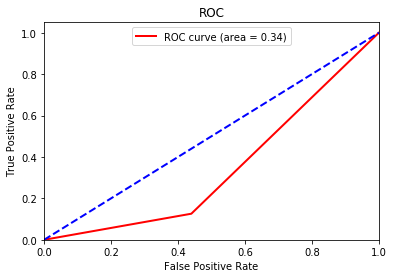

In [117]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(T_Test[:1000], Yl)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.legend(loc="upper center")
plt.show()

#### Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(T_Test[:1000],Yl )
cf

array([[489, 384],
       [111,  16]], dtype=int64)

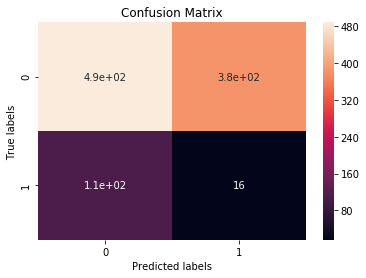

In [119]:
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

#### Actual Vs Predicted

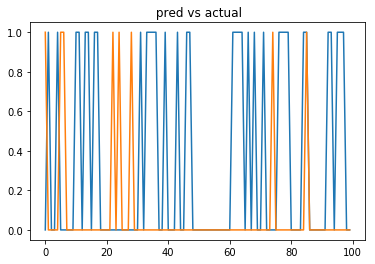

In [121]:
plt.title(" pred vs actual")
plt.plot(Yl[0:100])
plt.plot(np.array(T_Test[0:100]))
plt.show()

## IV. Experiments

### Evaluation Metrics

#### Precision 

Precision attempts to answer the following question: What proportion of positive identifications was actually correct.
Precision is defined as follows:

$ Precision = \frac{TP}{TP+FP} $


#### Recall

Recall gives us the following answer i.e. what proportion of actual positives was identified correctly.

$ Recall = \frac{TP}{TP+FN} $

#### F1 Score

For convenience, many people want a single measure rather than multiple as above. For those, we can provide the harmonic mean of precision and recall.

$ F1 Score = \frac{TP}{TP + \frac{FN+FP}{2}} $



#### ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1. True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows 
   $ TPR = \frac{TP}{TP+FN} $

2. False Positive Rate (FPR) is defined as follows
   $ FPR = \frac{FP}{FP+TN} $
   

#### AUC curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.


#### Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

## V.  Discussion about Classification models

#### Discussion about train test accuracy

- The evaluation about all the different classification model behaved on the dataset with all the evaluation matrix.
- We know that data is not linearly seperable. Linear classification method does not perform well for this kind of data.
- The time required to perform the 4 algorithm for big data was time consuming.
- Thats why very large input has not been used in the above algorithms. 
- We can also see the confusion matrix which is created in each algorithm. 

#### Discussion for classification model comparison

The following are the Evaluation score for all the 4 algorithms

1. Pocket Algorithm : -
Precision:- 50.00%
Recall:- 48.98%
F1 score:- 49.48%

2. LDA: -
Precision: 71.26%
Recall: 71.26%
F1 score: 71.26%

3. QDA: -
Precision: 65.50%
Recall: 65.50%
F1 score: 65.50%

4. Logistic Regression : -
Precision: 59.40%
Recall: 59.40%
F1 score: 59.40%

From the above we can see that LDA is the best performing algorithm for our data. One thing which was noticing was Pocket Algorithm performs very slowly compared to all the other algorithm. 

One other thing is QDA being quadratic can perform well for distinguishing the classification compared to LDA.



## Conclusion

The assignment helped us a lot to learn the classification model approaches. Successfully implemented all the approaches. Implementing all this algorithm from zero helped me learn all the classification model. All the math and the logic behind this classification model was learnt while implementing this assignment. Get to know various comparision between QDA and LDA, difference between Logistic and Linear Regression. The overcoming of perceptron algorithm by Pocket algorithm all can be verified in this algorithm. 

### Refrences

- PennState Elberly College of Science. (n.d.). Page not found. Retrieved from https://newonlinecourses.science.psu.edu/stat508/lesson/
- Toward Data Science, C. (2019, August 4). Linear Discriminant Analysis In Python. Retrieved from https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
- Molnar, C. (2019, September 18). 4.2 Logistic Regression | Interpretable Machine Learning. Retrieved from https://christophm.github.io/interpretable-ml-book/logistic.html
- A computer science portal for geeks. (n.d.). Retrieved from https://www.geeksforgeeks.org/
- Confusion Matrix in Machine Learning. (2018, February 7). Retrieved from https://www.geeksforgeeks.org/confusion-matrix-machine-learning/


